In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
#from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Convolution2D, Flatten, MaxPooling2D

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tensorflow.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
'''from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/plant-seedlings-classification.zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/plant-seedlings-classification-extracted')'''

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/plant-seedlings-classification-extracted/plant-seedlings-classification/train/'

In [ ]:
X = []
y = []
labels = []
df = pd.DataFrame(columns=['Image_Name', 'Class', 'Actual_Image'])

for dir_folder_name in os.listdir(TRAIN_DIR):
  if dir_folder_name!='.DS_Store':
    print(dir_folder_name)
    labels.append(dir_folder_name) 
    for image_name in os.listdir(os.path.join(TRAIN_DIR, dir_folder_name)):
      
      # read each image inside train directory one by one
      image = cv2.imread(os.path.join(TRAIN_DIR, dir_folder_name, image_name))
      try:
        image = cv2.resize(image,(128,128), interpolation=cv2.INTER_AREA)
      except:
        break
      X.append(image)
      y.append(dir_folder_name)
      new_row = {'Image_Name': image_name, 'Class': dir_folder_name, 'Actual_Image' : image}
      #append row to the dataframe
      df = df.append(new_row, ignore_index=True)

X = np.array(X)
y = np.array(y)
print(f'X array shape : {X.shape}\n y array shape : {y.shape}')

Scentless Mayweed
Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize
X array shape : (4750, 128, 128, 3)
 y array shape : (4750,)


In [ ]:
df

,Image_Name,Class,Actual_Image
0,8bc379617.png,Scentless Mayweed,"[[[120, 124, 129], [115, 115, 116], [38, 36, 4..."
1,5add1370e.png,Scentless Mayweed,"[[[42, 54, 62], [47, 60, 68], [49, 62, 71], [4..."
2,2e4ae28f4.png,Scentless Mayweed,"[[[152, 156, 159], [148, 152, 156], [146, 151,..."
3,a390479c5.png,Scentless Mayweed,"[[[27, 33, 46], [34, 43, 53], [31, 41, 50], [3..."
4,03ee6340f.png,Scentless Mayweed,"[[[168, 170, 172], [169, 171, 172], [170, 172,..."
...,...,...,...
4745,b8b2658d9.png,Maize,"[[[38, 48, 62], [40, 51, 65], [40, 56, 74], [6..."
4746,edd80f8a8.png,Maize,"[[[81, 103, 119], [85, 107, 121], [50, 75, 94]..."
4747,8c71f9b84.png,Maize,"[[[141, 141, 140], [141, 141, 141], [141, 143,..."
4748,fb6328acb.png,Maize,"[[[61, 79, 98], [52, 70, 91], [43, 62, 85], [4..."


In [ ]:
# Image dataframe Column shape

df['Actual_Image'].shape

(4750,)

In [ ]:
# Display 1 row value for the Image column

df.iat[0,2]

array([[[120, 124, 129],
        [115, 115, 116],
        [ 38,  36,  48],
        ...,
        [ 46,  44,  55],
        [ 43,  43,  56],
        [ 46,  48,  59]],

       [[111, 114, 117],
        [106, 109, 101],
        [ 42,  39,  51],
        ...,
        [ 62,  61,  69],
        [ 65,  64,  73],
        [ 75,  74,  84]],

       [[116, 119, 119],
        [135, 140, 125],
        [ 38,  37,  49],
        ...,
        [ 58,  57,  65],
        [ 60,  59,  68],
        [ 64,  62,  71]],

       ...,

       [[ 37,  56,  79],
        [ 45,  61,  82],
        [ 42,  60,  79],
        ...,
        [ 48,  73,  94],
        [ 50,  76,  98],
        [ 50,  75,  97]],

       [[ 50,  73,  93],
        [ 54,  73,  88],
        [ 38,  56,  77],
        ...,
        [ 55,  76,  95],
        [ 56,  81,  99],
        [ 59,  84, 103]],

       [[ 53,  76,  96],
        [ 63,  82,  95],
        [ 57,  76,  90],
        ...,
        [ 64,  80,  98],
        [ 67,  85, 103],
        [ 71,  91, 110]]

Enter the random number of images
5
[ 235 3980  905 2763 2895]


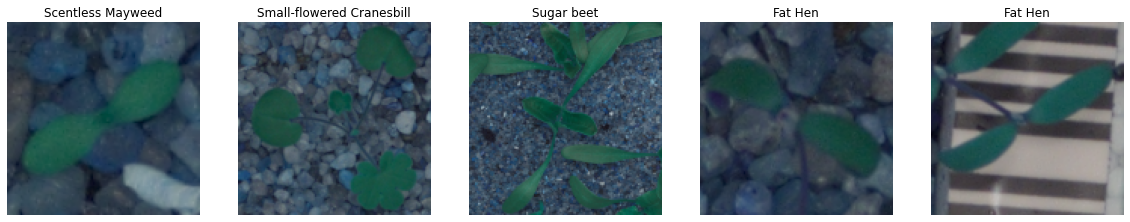

In [ ]:
# Input from user
print("Enter the random number of images")  
number=int(input())    

#Display inputed number of images
rand = np.random.randint(0, df.shape[0], number) # Generating 5 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

In [ ]:
# Split data into X and y variables

X = df['Actual_Image']
y = df['Class']
print(f'X and y shape : {X.shape, y.shape}')

# Reshaping the images

X_ndarray = np.zeros((X.shape[0], 128,128,3))

for index, value in enumerate(X):
  X_ndarray[index] = value

print(f'Reshaped X dataset : {X_ndarray.shape}')

X and y shape : ((4750,), (4750,))
Reshaped X dataset : (4750, 128, 128, 3)


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_encoded= label_encoder.fit_transform(df['Class'])

print(type(y_encoded))
print(y_encoded.shape)

<class 'numpy.ndarray'>
(4750,)


In [ ]:
# Reshaping train and test data again & then Normalizing X data

X_ndarray = X_ndarray.astype('float32')
X_ndarray_reshaped = X_ndarray.reshape(X_ndarray.shape[0], 128,128,3) # 128X128X3
X_ndarray_reshaped = X_ndarray_reshaped/255

y_encoded_reshaped = y_encoded.reshape(y_encoded.shape[0],1)

print('Reshaped X and y:', X_ndarray_reshaped.shape, y_encoded_reshaped.shape)

Reshaped X and y: (4750, 128, 128, 3) (4750, 1)


In [ ]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ndarray_reshaped, y_encoded_reshaped, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# CNN Model Architecture Creation

backend.clear_session()

random.seed(42)
tensorflow.random.set_seed(42)

model_cn = Sequential()

model_cn.add(BatchNormalization(input_shape = (128, 128, 3)))

model_cn.add(Convolution2D(filters = 16, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model_cn.add(MaxPooling2D(pool_size = 3))


model_cn.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cn.add(MaxPooling2D(pool_size = 3))

model_cn.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_cn.add(MaxPooling2D(pool_size = 3))

model_cn.add(Flatten()) 

# fully connected layer
model_cn.add(Dense(units = 64,activation = 'relu'))
model_cn.add(Dense(units = 32,activation = 'relu'))
model_cn.add(Dense(units = 16,activation = 'relu'))

# Classification layer
model_cn.add(Dense(units = 12, activation = 'softmax')) 

In [ ]:
optimizer = Adam()
model_cn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_cn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                        

In [ ]:
# Fit model on the Train Data

MODEL_CN = model_cn.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), initial_epoch=0)

Train on 3800 samples, validate on 950 samples
Epoch 1/10
3800/3800 [==============================] - 3s 743us/sample - loss: 2.2931 - acc: 0.1939 - val_loss: 2.2528 - val_acc: 0.3337
Epoch 2/10
3800/3800 [==============================] - 2s 402us/sample - loss: 1.7487 - acc: 0.3942 - val_loss: 2.0839 - val_acc: 0.2853
Epoch 3/10
3800/3800 [==============================] - 2s 402us/sample - loss: 1.4056 - acc: 0.5147 - val_loss: 1.6434 - val_acc: 0.4379
Epoch 4/10
3800/3800 [==============================] - 2s 407us/sample - loss: 1.1047 - acc: 0.6050 - val_loss: 1.1173 - val_acc: 0.6253
Epoch 5/10
3800/3800 [==============================] - 2s 405us/sample - loss: 0.9575 - acc: 0.6639 - val_loss: 0.9493 - val_acc: 0.6821
Epoch 6/10
3800/3800 [==============================] - 2s 400us/sample - loss: 0.7780 - acc: 0.7208 - val_loss: 0.9731 - val_acc: 0.6768
Epoch 7/10
3800/3800 [==============================] - 2s 403us/sample - loss: 0.7200 - acc: 0.7482 - val_loss: 0.7708 - val

labels: ['Scentless Mayweed', 'Cleavers', 'Sugar beet', 'Common Chickweed', 'Loose Silky-bent', 'Shepherds Purse', 'Fat Hen', 'Common wheat', 'Black-grass', 'Small-flowered Cranesbill', 'Charlock', 'Maize']

Softmax Outputs: [[1.3072319e-04 4.1486472e-03 6.8729417e-04 2.6389703e-03 7.8624163e-07
  3.5612714e-01 4.3021741e-06 2.3873303e-02 6.1902411e-02 6.1188490e-05
  1.1991950e-03 5.4922611e-01]]

Predicted_Label: Maize


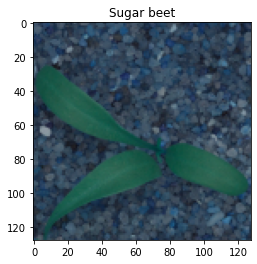

In [ ]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 1000

print(f'labels: {labels}\n')
plt.title(y[n])
plt.imshow(X[n])

y_predicted = model_cn.predict(X_ndarray_reshaped[n].reshape(1, 128,128,3))
print(f'Softmax Outputs: {y_predicted}\n')

# Convert the predicted probabilities to labels
for i in y_predicted:
    for index, value in enumerate(i):
        if value == y_predicted.max():
            print('Predicted_Label:', labels[index])